Here we will use a dataset with information on employees concerning salary, training, and other metrics. We will use these metrics to determine and discover various strategies that may be used to reduce attrition in employees.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading file

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Looking at unique values

In [5]:
df.apply(lambda x: x.unique())

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

#### Checking for null / missing values

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<br> <br>

### Data Visualisation & Analysis

#### Attrition

Text(0, 0.5, 'Number of Employees')

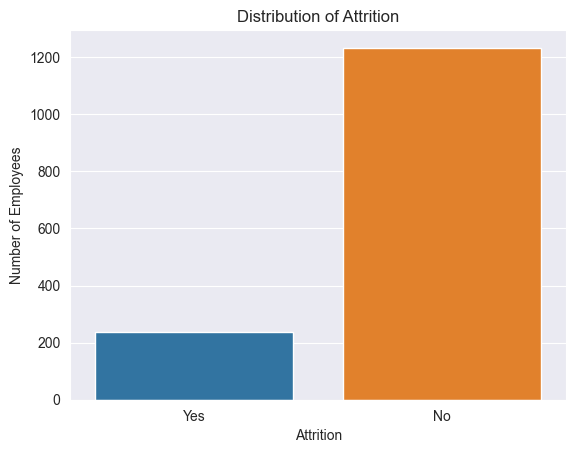

In [7]:
sns.set_style('darkgrid')
sns.countplot(data = df, x = 'Attrition')
plt.title('Distribution of Attrition')
plt.ylabel('Number of Employees')

In [8]:
counts = df['Attrition'].value_counts()
counts = counts / len(df['Attrition']) * 100
counts

No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64

83.88% of employees are still at company, 16.12% of employees have left company.

<br><br>

#### The age distribution of employees, and its impact on attrition

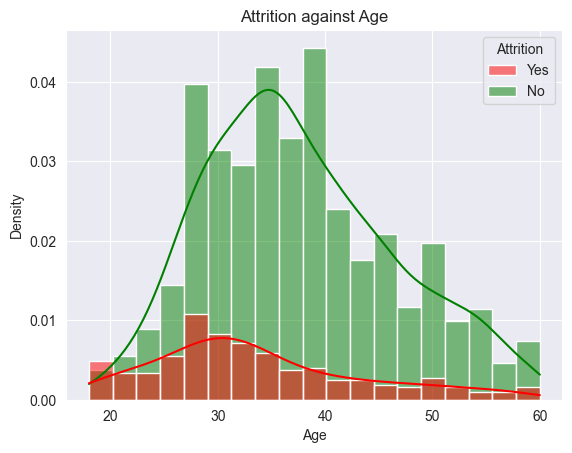

In [9]:
sns.histplot(data = df, x = 'Age', hue ='Attrition', kde = 'True', palette = {'Yes': 'red', 'No': 'green'}, stat = 'density')
plt.title('Attrition against Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

The distribution of 'No' just shows the distribution of the company workforce, with the majority of employees aged 30-40. For 'Yes', we can see that the majority of employee exits occur when employees are 25-35, and for those older, attrition is stable.

<br><br>

#### The impact of Salary on Attrition

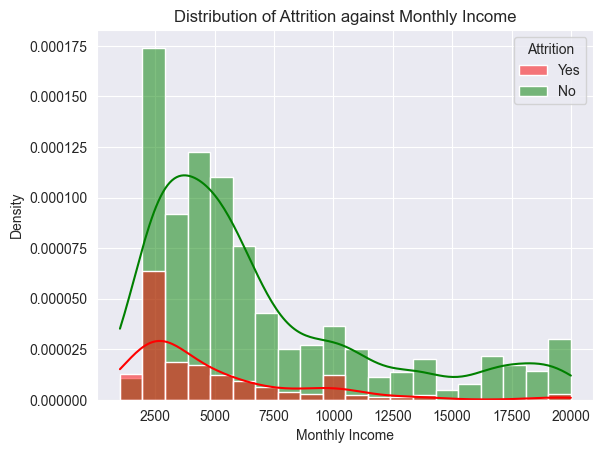

In [10]:
sns.histplot(data= df, x= "MonthlyIncome", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Attrition against Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.show()

It is observed that the majority of employees are at a monthly income of around 5000. This may also explain the larger proportion of employees quitting at around the 2500 to 5000 Income mark. Besides that, employee attrition is fairly stable, with no other abnormalities.

<br><br>

#### The impact of Departments, Job Roles and Satisfaction on Attrition

Text(0.5, 1.0, 'Attrition for each Department')

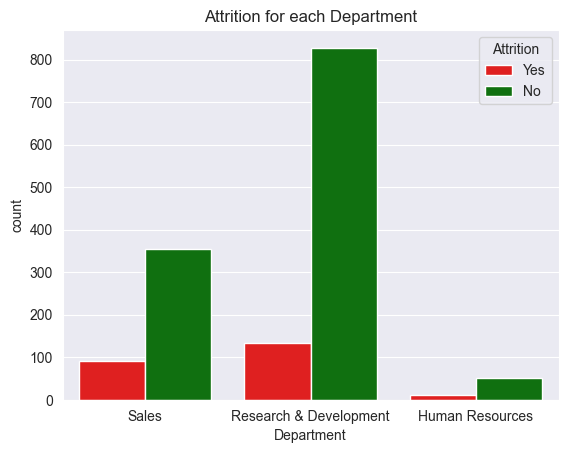

In [24]:
sns.countplot(data = df, x = 'Department', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Department')

In [12]:
departments = df.groupby(['Department', 'Attrition']).size().reset_index(name = 'Count')
department_totals = df.groupby('Department').size()
departments["Percentage of Department"] = departments.apply(lambda row: (row["Count"] / department_totals[row["Department"]]) * 100, axis=1)
departments.style.hide(axis ='index')

Department,Attrition,Count,Percentage of Department
Human Resources,No,51,80.952381
Human Resources,Yes,12,19.047619
Research & Development,No,828,86.160250
Research & Development,Yes,133,13.839750
Sales,No,354,79.372197
Sales,Yes,92,20.627803


The Research and Development department has the largest number of employees, followed by the Sales department, and then Human Resources. When only comparing departments, Research and Development has a lower attrition rate compared to Sales and Human Resources. This could signal for a focus on the Sales and Human Resources departments and further investigation to understand reasons and causes, and would lead to potentially the most drastic improvement for employee retention.

Text(0.5, 1.0, 'Attrition for each Role')

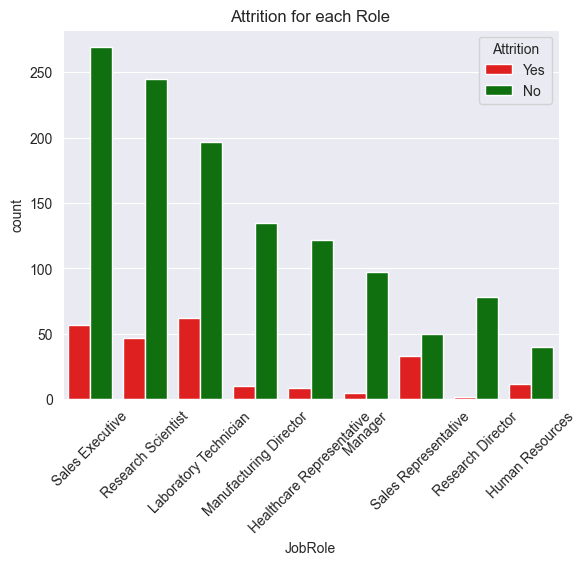

In [26]:

sns.countplot(data = df, x = 'JobRole', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.xticks(rotation = 45)
plt.title('Attrition for each Role')

In [17]:
role = df.groupby(['JobRole', 'Attrition']).size().reset_index(name = 'Count')
role_totals = df.groupby('JobRole').size()
role["Percentage of Role"] = role.apply(lambda row: (row["Count"] / role_totals[row["JobRole"]]) * 100, axis=1)
role = role[role['Attrition'] == 'Yes']
role = role.sort_values(by = 'Percentage of Role', ascending = False)
role = role.style.hide(axis ='index')
role

JobRole,Attrition,Count,Percentage of Role
Sales Representative,Yes,33,39.759036
Laboratory Technician,Yes,62,23.938224
Human Resources,Yes,12,23.076923
Sales Executive,Yes,57,17.484663
Research Scientist,Yes,47,16.095890
Manufacturing Director,Yes,10,6.896552
Healthcare Representative,Yes,9,6.870229
Manager,Yes,5,4.901961
Research Director,Yes,2,2.500000


Using the Job Role data, we can calculate the attrition level for each Job Role. There is a distinct difference in attrition levels between the various job roles that exist. We can see that Sales Representatives have a considerably higher attrition rate compared to other Job Roles, along with other roles typically assigned to the Human Resources and Research & Development departments. Managing directors and more senior figures have lower attrition levels, with the exception of the Sales Executive, who for a senior figure has a higher attrition rate compared to the other senior positions.

Text(0.5, 1.0, 'Attrition for each Job Satisfaction Rating')

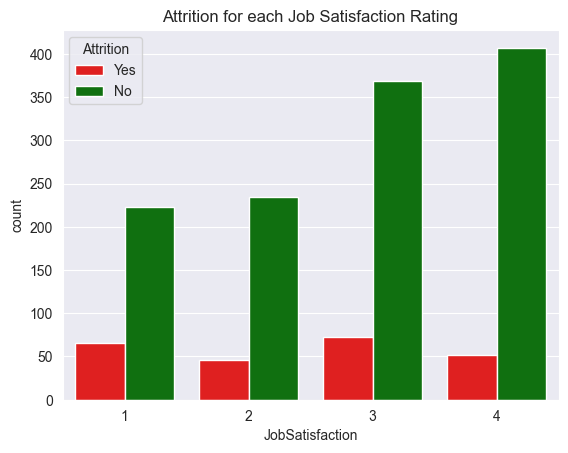

In [28]:
sns.countplot(data = df, x = 'JobSatisfaction', hue = 'Attrition', palette = {'Yes': 'red', 'No': 'green'})
plt.title('Attrition for each Job Satisfaction Rating')

In [15]:
satisfaction = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name = 'Count')
satisfaction_totals = df.groupby('JobSatisfaction').size()
satisfaction["Percentage of Satisfaction level"] = satisfaction.apply(lambda row: (row["Count"] / satisfaction_totals[row["JobSatisfaction"]]) * 100, axis=1)
satisfaction.style.hide(axis ='index')

JobSatisfaction,Attrition,Count,Percentage of Satisfaction level
1,No,223,77.162630
1,Yes,66,22.837370
2,No,234,83.571429
2,Yes,46,16.428571
3,No,369,83.484163
3,Yes,73,16.515837
4,No,407,88.671024
4,Yes,52,11.328976


From the data, it can be observed that there is a relationship between Job Satisfaction and attrition. As job satisfaction increases, the attrition level steadily decreases, with the lowest attrition at the highest Job Satisfaction level. Measures to improve job satisfaction could be taken to address attrition.

<br><br>

#### The impact of Distance From Home on Attrition

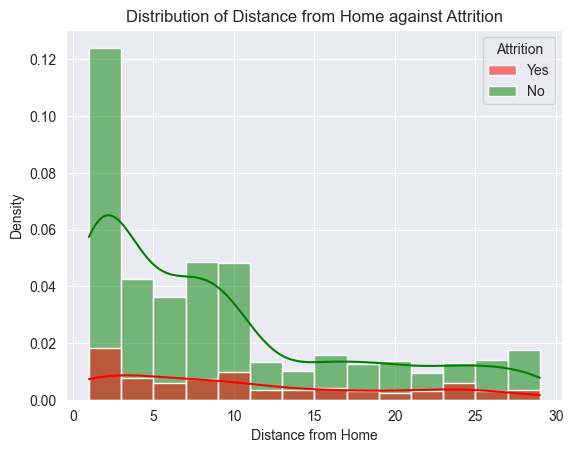

In [23]:
sns.histplot(data= df, x= "DistanceFromHome", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Distance from Home against Attrition")
plt.xlabel("Distance from Home")
plt.ylabel("Density")
plt.show()

As Distance from Home increases for employees, we can see that attrition increases, as a higher proportion of employees are choosing to quit as Distance from Home increases. To lower attrition, measures can be taken to decrease the effects of Distance from Home, such as moving towards Hybrid or even Remote work for compatible roles and positions.

<br><br>

#### The impact of Training time on attrition

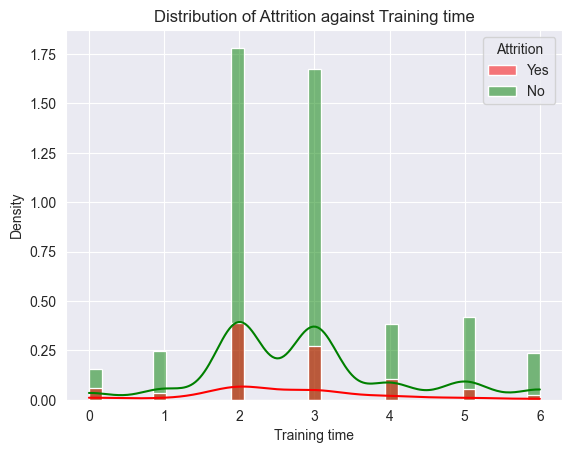

In [29]:
sns.histplot(data= df, x= "TrainingTimesLastYear", hue= "Attrition", stat = 'density', kde = 'True', palette = {'Yes': 'red', 'No': 'green'})
plt.title("Distribution of Attrition against Training time")
plt.xlabel("Training time")
plt.ylabel("Density")
plt.show()

In [30]:
training = df.groupby(['TrainingTimesLastYear', 'Attrition']).size().reset_index(name = 'Count')
training_totals = df.groupby('TrainingTimesLastYear').size()
training["Percentage of Training time"] = training.apply(lambda row: (row["Count"] / training_totals[row["TrainingTimesLastYear"]]) * 100, axis=1)
training = training[training['Attrition'] == 'Yes']
training = training.sort_values(by = 'Percentage of Training time', ascending = False)
training = training.style.hide(axis ='index')
training

TrainingTimesLastYear,Attrition,Count,Percentage of Training time
0,Yes,15,27.777778
4,Yes,26,21.138211
2,Yes,98,17.915905
3,Yes,69,14.052953
1,Yes,9,12.676056
5,Yes,14,11.764706
6,Yes,6,9.230769


Here, we show the relationship between those who are leaving the company, and the amount of training time that they received last year. We can see that the highest proportion of employees that are leaving are those received less training time compared to other employees, with the exception of category '4'. Those who received the most training times have the lowest attrition.

<br><br>

In [18]:
df.apply(lambda x: x.unique())

Age                         [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...
Attrition                                                           [Yes, No]
BusinessTravel                 [Travel_Rarely, Travel_Frequently, Non-Travel]
DailyRate                   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...
Department                   [Sales, Research & Development, Human Resources]
DistanceFromHome            [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...
Education                                                     [2, 1, 4, 3, 5]
EducationField              [Life Sciences, Other, Medical, Marketing, Tec...
EmployeeCount                                                             [1]
EmployeeNumber              [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,...
EnvironmentSatisfaction                                          [2, 3, 4, 1]
Gender                                                         [Female, Male]
HourlyRate                  [94, 61, 92, 56, 40, 79, 81, 67, 44,

In [19]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')